---
# Guía Análisis Multivariado

En esta guía repasaremos los elementos fundamentales del Análisis Multivariado. Se defime el **análisis multivariante** como el conjunto de técnicas estadísticas que tienen como objetivo analizar e interpretar las relaciones entre distintas variables de manera simultánea, mediante la construcción de modelos estadísticos complejos que permiten distinguir la contribución independiente de cada una de ellas en el sistema de relaciones y, de este modo, describir, explicar o predecir los fenómenos que son objeto de interés para la investigación. De una manera sencilla, podemos entender el análisis multivariante como una extensión del análisis bivariante y este, a su vez, como una extensión del análisis univariante.

En este sentido, el **análisis univariante** es la forma más simple de análisis
estadístico y se propone describir la distribución de una única característica de
los individuos que forman parte de la investigación. Mediante la construcción
de una tabla de frecuencias en el caso de una variable cualitativa, o bien del
cálculo de una medida de tendencia central –como la media, la mediana o la
moda– y de su dispersión –como el rango, la desviación estándar o la varianza–
cuando se trata de una variable cuantitativa, la clave de este tipo de análisis se
encuentra en el hecho de que solo toma en consideración una única variable
con el objetivo de realizar una descripción de la muestra y, cuando es posible,
establecer una inferencia sobre la población a la que representa.

Obviamente, cuando los investigadores llevan a cabo sus estudios nunca concentran todos los esfuerzos en observar únicamente una variable, pero, sea
cual sea el número de medidas registradas en la investigación, este primer tipo
de análisis se limita a explorar cada una de las variables de manera independiente.


Por otro lado, el **análisis bivariante** es una extensión del análisis univariante
que, a pesar de mantener su naturaleza exploratoria, se propone, en cambio,
determinar la relación existente entre dos características de los participantes
de la investigación. Mediante la construcción de una tabla de contingencia
cuando se trata de variables cualitativas, o del cálculo de una correlación en el
caso de variables cuantitativas, este tipo de análisis tiene por objeto examinar
la distribución de una variable dependiente, resultado o explicada en función
de los niveles de otra variable independiente, predictora o explicativa. De este modo, 
la observación de su asociación permite determinar la existencia de una
relación en la muestra y, siempre que sea posible, establecer una inferencia
sobre la población que representa.

Existen diversas técnicas para análisis multivariante, sin embargo, en esta guía nos vamos a concentrar en el análisis bivariado de correlaciones.


---

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [5]:
df = pd.read_csv('Estudiantes.csv')

In [3]:
df.head()

,Genero,Etnia,Nivel educativo de los padres,Examen de preparacion,Matematicas,Lectura,Escritura
0,Femenino,Grupo B,"Licenciatura, Ingenieria",No realizado,72,72,74
1,Femenino,Grupo C,"Educacion Superior, no titulado",Completado,69,90,88
2,Femenino,Grupo B,Maestria,No realizado,90,95,93
3,Masculino,Grupo A,Preparatoria,No realizado,47,57,44
4,Masculino,Grupo C,"Educacion Superior, no titulado",No realizado,76,78,75


### 1. Visualización de las relaciones

El análisis de correlaciones es una técnica estadística utilizada para examinar la relación entre dos o más variables. La correlación cuantifica la fuerza y la dirección de la relación entre las variables, lo que permite determinar si y cómo cambian juntas. Una forma sencilla de apreciar la correlación entre dos variables, es mediante el uso de un diagrama de dispersión o scatterplot.

Construya un scatterplot para visualizar la relación de todas las variables numéricas de la muestra.



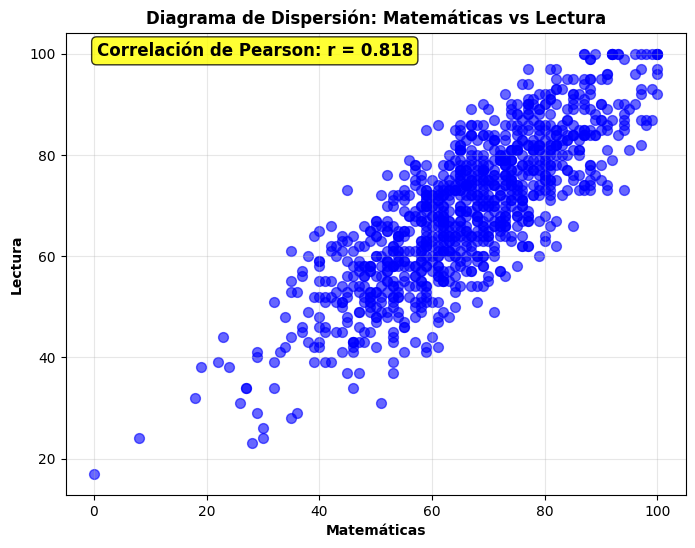

In [6]:
# scatterplot Matematicas-Lectura
plt.figure(figsize=(8, 6))
plt.scatter(df['Matematicas'], df['Lectura'], alpha=0.6, color='blue', s=50)
plt.xlabel('Matemáticas', fontweight='bold')
plt.ylabel('Lectura', fontweight='bold')
plt.title('Diagrama de Dispersión: Matemáticas vs Lectura', fontweight='bold')
plt.grid(True, alpha=0.3)

# Calcular correlación y mostrarla
corr_mat_lec = df['Matematicas'].corr(df['Lectura'])
plt.text(0.05, 0.95, f'Correlación de Pearson: r = {corr_mat_lec:.3f}',
         transform=plt.gca().transAxes, fontsize=12, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.8))

plt.show()

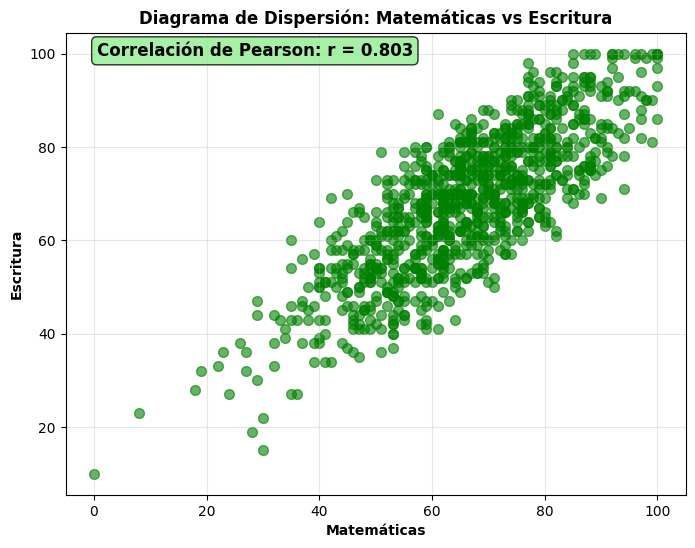

In [7]:
# scatterplot Matemáticas-Escritura
plt.figure(figsize=(8, 6))
plt.scatter(df['Matematicas'], df['Escritura'], alpha=0.6, color='green', s=50)
plt.xlabel('Matemáticas', fontweight='bold')
plt.ylabel('Escritura', fontweight='bold')
plt.title('Diagrama de Dispersión: Matemáticas vs Escritura', fontweight='bold')
plt.grid(True, alpha=0.3)

# Calcular correlación
corr_mat_esc = df['Matematicas'].corr(df['Escritura'])
plt.text(0.05, 0.95, f'Correlación de Pearson: r = {corr_mat_esc:.3f}',
         transform=plt.gca().transAxes, fontsize=12, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8))

plt.show()


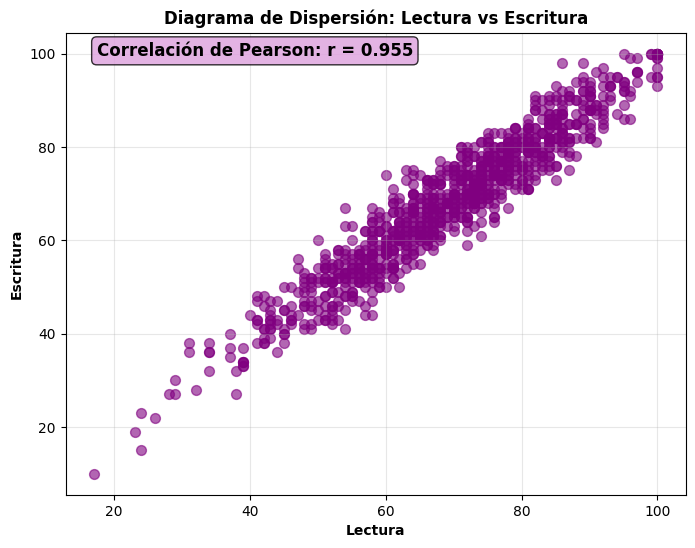

In [8]:
# scatterplot Lectura-Escritura

plt.figure(figsize=(8, 6))
plt.scatter(df['Lectura'], df['Escritura'], alpha=0.6, color='purple', s=50)
plt.xlabel('Lectura', fontweight='bold')
plt.ylabel('Escritura', fontweight='bold')
plt.title('Diagrama de Dispersión: Lectura vs Escritura', fontweight='bold')
plt.grid(True, alpha=0.3)

# Calcular correlación
corr_lec_esc = df['Lectura'].corr(df['Escritura'])
plt.text(0.05, 0.95, f'Correlación de Pearson: r = {corr_lec_esc:.3f}',
         transform=plt.gca().transAxes, fontsize=12, fontweight='bold',
         bbox=dict(boxstyle="round,pad=0.3", facecolor="plum", alpha=0.8))

plt.show()

In [7]:
# ¿Cuál de las 3 relaciones es más fuerte? ¿Cuál es más débil?

correlaciones = {
    'Matemáticas-Lectura': corr_mat_lec,
    'Matemáticas-Escritura': corr_mat_esc,
    'Lectura-Escritura': corr_lec_esc
}

print("="*60)
print("RESUMEN COMPARATIVO DE CORRELACIONES")
print("="*60)

# Mostrar todas las correlaciones
for par, corr in correlaciones.items():
    print(f"{par:20}: r = {corr:.4f} (R² = {corr**2:.4f})")

# Encontrar la más fuerte y más débil
correlaciones_abs = {k: abs(v) for k, v in correlaciones.items()}
mas_fuerte = max(correlaciones_abs, key=correlaciones_abs.get)
mas_debil = min(correlaciones_abs, key=correlaciones_abs.get)


RESUMEN COMPARATIVO DE CORRELACIONES
Matemáticas-Lectura : r = 0.8176 (R² = 0.6684)
Matemáticas-Escritura: r = 0.8026 (R² = 0.6442)
Lectura-Escritura   : r = 0.9546 (R² = 0.9113)


### 2. Coeficiente de correlación de Pearson

El coeficiente de correlación es una medida estadística que describe la relación entre dos variables. Este coeficiente indica la fuerza y la dirección de la relación entre las variables. En otras palabras, nos dice cómo cambian juntas dos variables.

Existen varios tipos de coeficientes de correlación, pero el más común es el coeficiente de correlación de Pearson, representado por r. Este coeficiente varía entre -1 y 1, donde:

- Si r = 1, significa una correlación positiva perfecta, lo que indica que cuando una variable aumenta, la otra también aumenta en proporción constante.
- Si r = −1, significa una correlación negativa perfecta, lo que indica que cuando una variable aumenta, la otra disminuye en proporción constante.
- Si r = 0, indica que no hay correlación lineal entre las variables, es decir, no hay relación lineal entre ellas.

$r_{xy} = \frac{n\sum_{}xy-\sum_{}x\sum_{}y}{\sqrt{(n\sum_{}x^{2}-(\sum_{}x)^{2})(n\sum_{}y^{2}-(\sum_{}y)^{2})}}$

El coeficiente de correlación de Pearson se utiliza principalmente para variables cuantitativas y asume que las variables están distribuidas normalmente y que la relación entre ellas es lineal.

In [ ]:
# construya una función que reciba dos conjuntos de datos y retorne el cálculo del coeficiente de correlación de Pearson
def r(x,y):
    correlacion = x.corr(y)
    return correlacion

# Interpretación
def interpretar_correlacion(r):
    """Interpreta la fuerza de la correlación"""
    r_abs = abs(r)
    if r_abs >= 0.9:
        fuerza = "muy fuerte"
    elif r_abs >= 0.7:
        fuerza = "fuerte"
    elif r_abs >= 0.5:
        fuerza = "moderada"
    elif r_abs >= 0.3:
        fuerza = "débil"
    else:
        fuerza = "muy débil o inexistente"
    
    direccion = "positiva" if r > 0 else "negativa" if r < 0 else "nula"
    return f"Correlación {fuerza} y {direccion}"

correlacion_mat_lec = r(df['Matematicas'], df['Lectura'])
print(f"Interpretación: {interpretar_correlacion(correlacion_mat_lec)}")


In [ ]:
# Calcule el coeficiente de correlación entre el conjunto de notas de Matemáticas y el conjunto de notas de Lectura
# construya una función que reciba dos conjuntos de datos y retorne el cálculo del coeficiente de correlación de Pearson
def r_manual(x, y):
    """
    Calcula el coeficiente de correlación de Pearson entre dos conjuntos de datos.
    
    Fórmula: r = [n∑xy - ∑x∑y] / √[(n∑x² - (∑x)²)(n∑y² - (∑y)²)]
    
    Parámetros:
    x: array-like, primera variable
    y: array-like, segunda variable
    
    Retorna:
    float: coeficiente de correlación de Pearson (-1 ≤ r ≤ 1)
    """
    import numpy as np
    
    # Convertir a arrays de numpy para facilitar los cálculos
    x = np.array(x)
    y = np.array(y)
    
    # Verificar que tengan la misma longitud
    if len(x) != len(y):
        raise ValueError("Los conjuntos de datos deben tener la misma longitud")
    
    n = len(x)
    
    # Calcular las sumas necesarias para la fórmula
    sum_x = np.sum(x)           # ∑x
    sum_y = np.sum(y)           # ∑y
    sum_xy = np.sum(x * y)      # ∑xy
    sum_x2 = np.sum(x ** 2)     # ∑x²
    sum_y2 = np.sum(y ** 2)     # ∑y²
    
    # Calcular el numerador: n∑xy - ∑x∑y
    numerador = n * sum_xy - sum_x * sum_y
    
    # Calcular el denominador: √[(n∑x² - (∑x)²)(n∑y² - (∑y)²)]
    denominador_x = n * sum_x2 - sum_x ** 2
    denominador_y = n * sum_y2 - sum_y ** 2
    denominador = np.sqrt(denominador_x * denominador_y)
    
    # Evitar división por cero
    if denominador == 0:
        return 0
    
    # Calcular el coeficiente de correlación
    correlacion = numerador / denominador
    
    return correlacion


In [ ]:
# Calcule el coeficiente de correlación entre el conjunto de notas de Matemáticas y el conjunto de notas de Escritura
r()
r_manual()


In [7]:
# Calcule el coeficiente de correlación entre el conjunto de notas de Lectura y el conjunto de notas de Escritura



In [ ]:
# ahora utilice el método corr() de la librería pandas. Contraste los resultados con sus cálculos anteriores.



### 3. Coeficiente de correlación de Spearman

El coeficiente de correlación de Spearman es una medida estadística que evalúa la relación entre dos conjuntos de datos, pero a diferencia del coeficiente de correlación de Pearson, no requiere que los datos sigan una distribución normal o que la relación entre las variables sea lineal. En cambio, el coeficiente de correlación de Spearman se basa en el grado de concordancia entre los rangos de las observaciones de las dos variables.

Aquí está la idea básica detrás del coeficiente de correlación de Spearman:

1. Asignación de rangos: Primero, para cada conjunto de datos, asignamos un rango a cada observación, donde el valor más bajo recibe un rango de 1, el siguiente valor más bajo recibe un rango de 2, y así sucesivamente hasta asignar el rango al valor mayor. Esto se repite en ambas variables.

2. Cálculo de las diferencias de rangos: Luego, para cada par de observaciones, calculamos la diferencia entre sus rangos asignados en el punto anterior.

3. Cálculo del coeficiente de correlación de Spearman: Finalmente, calculamos el coeficiente de correlación de Pearson entre los rangos de las observaciones en lugar de los valores reales.

$\rho  = 1 - \frac{6\sum _{1}^{n}d{_{i}}^{2}}{n(n^{2}-1)}$

En donde,
- $\rho$ es el coeficiente de correlación de Spearman.
- $d{_{i}}$ son las diferencias de los rangos de las observaciones en las dos variables.
- $n$ es el número de observaciones.



El coeficiente de correlación de Spearman puede variar entre -1 y 1, al igual que el coeficiente de correlación de Pearson. Una correlación de Spearman de 1 indica una correlación perfecta positiva, -1 indica una correlación perfecta negativa, y 0 indica una falta de correlación.

El coeficiente de correlación de Spearman es útil cuando los datos no siguen una distribución normal o cuando las relaciones entre las variables no son lineales. Se utiliza comúnmente en ciencias sociales, estudios de mercado y otros campos donde la relación entre las variables puede ser más compleja o no lineal.

In [9]:
# implementacion en Python del algoritmo de Sperman para el calculo de coeficiente de correlacion

def spearman_rank_correlation(x, y):
    
    # Paso 1: Ordenar los datos
    x_sorted = sorted(x)
    y_sorted = sorted(y)

    # Paso 2: Asignar rangos
    n = len(x)
    x_rank = {value: i+1 for i, value in enumerate(x_sorted)}
    y_rank = {value: i+1 for i, value in enumerate(y_sorted)}

    # Paso 3: Calcular las diferencias de rangos
    d = [x_rank[x[i]] - y_rank[y[i]] for i in range(n)]

    # Paso 4: Calcular el coeficiente de correlación de Spearman
    numerator = sum([(d[i])**2 for i in range(n)])
    denominator = n * (n**2 - 1)
    rho = 1 - (6 * numerator) / denominator

    return rho

In [10]:
# Ejemplo de uso
x = [5, 7, 3, 9, 6]
y = [80, 85, 70, 90, 75]
correlation = spearman_rank_correlation(x, y)
print("Coeficiente de correlación de Spearman:", correlation)


Coeficiente de correlación de Spearman: 0.9


In [ ]:
# Calcule el coeficiente de correlacion de Sperman entre las variables Matematicas - Lectura
correlation = spearman_rank_correlation(x, y)



In [ ]:
# Calcule el coeficiente de correlacion de Sperman entre las variables Matematicas - Escritura



In [ ]:
# Calcule el coeficiente de correlacion de Sperman entre las variables Lectura - Escritura



In [ ]:
# Contraste los resultados obtenidos entre los indices de Pearson y de Sperman. ¿Qué se observa?




### 4. Correlación de variables cualitativas

Como se puede observar, el algoritmo de cálculo del indice de correlación de Sperman realiza un ordenamiento de los valores de cada variable para asignar un valor rango. Esto significa que podríamos utilizar variables cualitativas ordinales. Realice el análisis de correlación entre las notas y el nivel educativo de los padres utilizando el coeficiente de Sperman.

Haga el preprocesamiento correspondiente a la columna categórica para que sea procesada de forma ordinal, se sugiere una codificación con números u otra.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# correlacion entre nivel educativo de los padres y Matematicas

# -------------- CODIFICACIÓN MANUAL ------------------#
# Preprocesamiento: codificación ordinal del nivel educativo de los padres
orden_educativo = {
    "Secundaria": 1,
    "Preparatoria": 2,
    "Educacion Superior, no titulado": 3,
    "Licenciatura, Ingenieria": 4,
    "Maestria": 5
}

# Crear columna codificada
df['Nivel_educativo_cod'] = df['Nivel educativo de los padres'].map(orden_educativo)

# -------------- CODIFICACIÓN MEDIANTE ENCODER ------------------#
orden = [
    "Secundaria",
    "Preparatoria",
    "Educacion Superior, no titulado",
    "Licenciatura, Ingenieria",
    "Maestria"
]

encoder = OrdinalEncoder(categories=[orden])
# Codificar la columna (reshape necesario para sklearn)
df['Nivel_educativo_cod'] = encoder.fit_transform(df[['Nivel educativo de los padres']])


# Verificar codificación
print(df[['Nivel educativo de los padres', 'Nivel_educativo_cod']].drop_duplicates())

# Calcular correlación de Spearman entre nivel educativo y Matemáticas
from scipy.stats import spearmanr

# Eliminar filas con valores nulos en la codificación
df_valid = df.dropna(subset=['Nivel_educativo_cod', 'Matematicas'])

rho, pval = spearmanr(df_valid['Nivel_educativo_cod'], df_valid['Matematicas'])
print(f"Coeficiente de Spearman (nivel educativo vs matemáticas): {rho:.4f}")
print(f"p-valor: {pval:.4f}")

# Interpretación rápida
if abs(rho) >= 0.5:
    interpretacion = "Correlación moderada o fuerte"
elif abs(rho) >= 0.3:
    interpretacion = "Correlación débil"
else:
    interpretacion = "Correlación muy débil o inexistente"
print(f"Interpretación: {interpretacion}, {'positiva' if rho > 0 else 'negativa' if rho < 0 else 'nula'}")

In [ ]:
# correlacion entre nivel educativo de los padres y Lectura



In [ ]:
# correlacion entre nivel educativo de los padres y Escritura



In [11]:
# ¿Qué se puede concluir?



---